<a href="https://colab.research.google.com/github/PanavShah1/deep_learning_projects/blob/main/Stock_Predictor_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Analysing data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [ ]:
df = pd.read_csv('NVDA (2).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000
...,...,...,...,...,...,...,...
6385,2024-06-07,119.769997,121.692001,118.022003,120.888000,120.878075,412386000
6386,2024-06-10,120.370003,123.099998,117.010002,121.790001,121.779999,314162700
6387,2024-06-11,121.769997,122.870003,118.739998,120.910004,120.910004,222551200
6388,2024-06-12,123.059998,126.879997,122.570000,125.199997,125.199997,299595000


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000
...,...,...,...,...,...,...,...
6385,2024-06-07,119.769997,121.692001,118.022003,120.888000,120.878075,412386000
6386,2024-06-10,120.370003,123.099998,117.010002,121.790001,121.779999,314162700
6387,2024-06-11,121.769997,122.870003,118.739998,120.910004,120.910004,222551200
6388,2024-06-12,123.059998,126.879997,122.570000,125.199997,125.199997,299595000


In [ ]:
df.keys()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1999-01-22,0.041016
1,1999-01-25,0.045313
2,1999-01-26,0.041797
3,1999-01-27,0.041667
4,1999-01-28,0.041536
...,...,...
6385,2024-06-07,120.888000
6386,2024-06-10,121.790001
6387,2024-06-11,120.910004
6388,2024-06-12,125.199997


In [ ]:
from copy import deepcopy
def history(df,
            num_of_days: int = 7):
  df_copy = deepcopy(df)
  for i in range(1, num_of_days+1):
    df_copy[f"Close(t-{i})"] = df_copy["Close"].shift(i)
  return df_copy



In [ ]:
num_of_days = 7
df_history = history(df=df,
                     num_of_days=num_of_days)
df_history.head(10)

,Date,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
0,1999-01-22,0.041016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-01-25,0.045313,0.041016,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-01-26,0.041797,0.045313,0.041016,NaN,NaN,NaN,NaN,NaN
3,1999-01-27,0.041667,0.041797,0.045313,0.041016,NaN,NaN,NaN,NaN
4,1999-01-28,0.041536,0.041667,0.041797,0.045313,0.041016,NaN,NaN,NaN
5,1999-01-29,0.039583,0.041536,0.041667,0.041797,0.045313,0.041016,NaN,NaN
6,1999-02-01,0.040365,0.039583,0.041536,0.041667,0.041797,0.045313,0.041016,NaN
7,1999-02-02,0.037240,0.040365,0.039583,0.041536,0.041667,0.041797,0.045313,0.041016
8,1999-02-03,0.038021,0.037240,0.040365,0.039583,0.041536,0.041667,0.041797,0.045313
9,1999-02-04,0.040104,0.038021,0.037240,0.040365,0.039583,0.041536,0.041667,0.041797


In [ ]:
df = df_history.dropna(axis=0)
df

,Date,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
7,1999-02-02,0.037240,0.040365,0.039583,0.041536,0.041667,0.041797,0.045313,0.041016
8,1999-02-03,0.038021,0.037240,0.040365,0.039583,0.041536,0.041667,0.041797,0.045313
9,1999-02-04,0.040104,0.038021,0.037240,0.040365,0.039583,0.041536,0.041667,0.041797
10,1999-02-05,0.041276,0.040104,0.038021,0.037240,0.040365,0.039583,0.041536,0.041667
11,1999-02-08,0.039844,0.041276,0.040104,0.038021,0.037240,0.040365,0.039583,0.041536
...,...,...,...,...,...,...,...,...,...
6385,2024-06-07,120.888000,120.998001,122.440002,116.436996,115.000000,109.633003,110.500000,114.824997
6386,2024-06-10,121.790001,120.888000,120.998001,122.440002,116.436996,115.000000,109.633003,110.500000
6387,2024-06-11,120.910004,121.790001,120.888000,120.998001,122.440002,116.436996,115.000000,109.633003
6388,2024-06-12,125.199997,120.910004,121.790001,120.888000,120.998001,122.440002,116.436996,115.000000


In [ ]:
def convert_date_to_int(df):
    df_copy = deepcopy(df)
    df_copy['Date'] = pd.to_datetime(df_copy['Date']).astype(int) / 10**9
    return df_copy

In [ ]:
def convert_int_to_date(df):
    df_copy = deepcopy(df)
    df_copy['Date'] = pd.to_datetime(df_copy['Date'], unit='s')
    return df_copy

In [ ]:
df_date_int = convert_date_to_int(df)
df_date_int

,Date,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
7,9.179136e+08,0.037240,0.040365,0.039583,0.041536,0.041667,0.041797,0.045313,0.041016
8,9.180000e+08,0.038021,0.037240,0.040365,0.039583,0.041536,0.041667,0.041797,0.045313
9,9.180864e+08,0.040104,0.038021,0.037240,0.040365,0.039583,0.041536,0.041667,0.041797
10,9.181728e+08,0.041276,0.040104,0.038021,0.037240,0.040365,0.039583,0.041536,0.041667
11,9.184320e+08,0.039844,0.041276,0.040104,0.038021,0.037240,0.040365,0.039583,0.041536
...,...,...,...,...,...,...,...,...,...
6385,1.717718e+09,120.888000,120.998001,122.440002,116.436996,115.000000,109.633003,110.500000,114.824997
6386,1.717978e+09,121.790001,120.888000,120.998001,122.440002,116.436996,115.000000,109.633003,110.500000
6387,1.718064e+09,120.910004,121.790001,120.888000,120.998001,122.440002,116.436996,115.000000,109.633003
6388,1.718150e+09,125.199997,120.910004,121.790001,120.888000,120.998001,122.440002,116.436996,115.000000


In [ ]:
convert_int_to_date(df_date_int)

,Date,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
7,1999-02-02,0.037240,0.040365,0.039583,0.041536,0.041667,0.041797,0.045313,0.041016
8,1999-02-03,0.038021,0.037240,0.040365,0.039583,0.041536,0.041667,0.041797,0.045313
9,1999-02-04,0.040104,0.038021,0.037240,0.040365,0.039583,0.041536,0.041667,0.041797
10,1999-02-05,0.041276,0.040104,0.038021,0.037240,0.040365,0.039583,0.041536,0.041667
11,1999-02-08,0.039844,0.041276,0.040104,0.038021,0.037240,0.040365,0.039583,0.041536
...,...,...,...,...,...,...,...,...,...
6385,2024-06-07,120.888000,120.998001,122.440002,116.436996,115.000000,109.633003,110.500000,114.824997
6386,2024-06-10,121.790001,120.888000,120.998001,122.440002,116.436996,115.000000,109.633003,110.500000
6387,2024-06-11,120.910004,121.790001,120.888000,120.998001,122.440002,116.436996,115.000000,109.633003
6388,2024-06-12,125.199997,120.910004,121.790001,120.888000,120.998001,122.440002,116.436996,115.000000


## Converting to tensors

In [ ]:
df_numpy = df_date_int.to_numpy()
df_numpy

array([[9.17913600e+08, 3.72400000e-02, 4.03650000e-02, ...,
        4.17970000e-02, 4.53130000e-02, 4.10160000e-02],
       [9.18000000e+08, 3.80210000e-02, 3.72400000e-02, ...,
        4.16670000e-02, 4.17970000e-02, 4.53130000e-02],
       [9.18086400e+08, 4.01040000e-02, 3.80210000e-02, ...,
        4.15360000e-02, 4.16670000e-02, 4.17970000e-02],
       ...,
       [1.71806400e+09, 1.20910004e+02, 1.21790001e+02, ...,
        1.16436996e+02, 1.15000000e+02, 1.09633003e+02],
       [1.71815040e+09, 1.25199997e+02, 1.20910004e+02, ...,
        1.22440002e+02, 1.16436996e+02, 1.15000000e+02],
       [1.71823680e+09, 1.29610001e+02, 1.25199997e+02, ...,
        1.20998001e+02, 1.22440002e+02, 1.16436996e+02]])

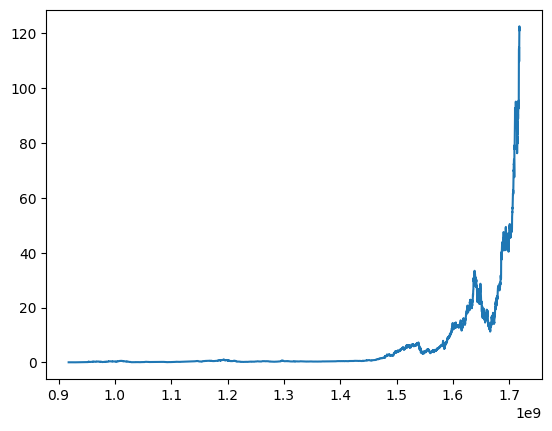

In [ ]:
plt.plot(df_numpy[:,0], df_numpy[:,4])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
shifted_df_numpy = scaler.fit_transform(df_numpy)
shifted_df_numpy

array([[0.00000000e+00, 2.41171417e-05, 4.99337351e-05, ...,
        6.27584195e-05, 9.14825281e-05, 5.92854742e-05],
       [1.07956386e-04, 3.01444977e-05, 2.49668676e-05, ...,
        6.16963790e-05, 6.27584195e-05, 9.62003681e-05],
       [2.15912771e-04, 4.62200197e-05, 3.12065871e-05, ...,
        6.06261691e-05, 6.16963790e-05, 6.59949301e-05],
       ...,
       [9.99784087e-01, 9.32857901e-01, 9.72756186e-01, ...,
        9.50958192e-01, 9.39218593e-01, 9.41547899e-01],
       [9.99892044e-01, 9.65965859e-01, 9.65725540e-01, ...,
        1.00000000e+00, 9.50958192e-01, 9.87654979e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        9.88219513e-01, 1.00000000e+00, 1.00000000e+00]])

In [ ]:
import torch
from torch import nn

In [ ]:
df_tensor = torch.tensor(shifted_df_numpy)
df_tensor

tensor([[0.0000e+00, 2.4117e-05, 4.9934e-05,  ..., 6.2758e-05, 9.1483e-05,
         5.9285e-05],
        [1.0796e-04, 3.0144e-05, 2.4967e-05,  ..., 6.1696e-05, 6.2758e-05,
         9.6200e-05],
        [2.1591e-04, 4.6220e-05, 3.1207e-05,  ..., 6.0626e-05, 6.1696e-05,
         6.5995e-05],
        ...,
        [9.9978e-01, 9.3286e-01, 9.7276e-01,  ..., 9.5096e-01, 9.3922e-01,
         9.4155e-01],
        [9.9989e-01, 9.6597e-01, 9.6573e-01,  ..., 1.0000e+00, 9.5096e-01,
         9.8765e-01],
        [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 9.8822e-01, 1.0000e+00,
         1.0000e+00]], dtype=torch.float64)

## Create X and y

In [ ]:
X = df_tensor[:, 2:]
y = df_tensor[:, 1]
X.shape, y.shape

(torch.Size([6383, 7]), torch.Size([6383]))

In [ ]:
train_size = int(len(y) * 0.95)
train_size

6063

In [ ]:
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([6063, 7]),
 torch.Size([320, 7]),
 torch.Size([6063]),
 torch.Size([320]))

## Dataset and DataLoader

In [ ]:
X_train = X_train.reshape((-1, num_of_days, 1))
X_test = X_test.reshape((-1, num_of_days, 1))
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([6063, 7, 1]),
 torch.Size([320, 7, 1]),
 torch.Size([6063, 1]),
 torch.Size([320, 1]))

In [ ]:
X_train = torch.tensor(X_train).to(torch.float32)
X_test = torch.tensor(X_test).to(torch.float32)
y_train = torch.tensor(y_train).to(torch.float32)
y_test = torch.tensor(y_test).to(torch.float32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

<ipython-input-1349-9fc8557fe904>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).to(torch.float32)
<ipython-input-1349-9fc8557fe904>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).to(torch.float32)
<ipython-input-1349-9fc8557fe904>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train).to(torch.float32)
<ipython-input-1349-9fc8557fe904>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or source

(torch.Size([6063, 7, 1]),
 torch.Size([320, 7, 1]),
 torch.Size([6063, 1]),
 torch.Size([320, 1]))

In [ ]:
from torch.utils.data import Dataset

class StockDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    return X[idx].to(float), y[idx].to(float)

train_dataset = StockDataset(X_train, y_train)
test_dataset = StockDataset(X_test, y_test)

In [ ]:
train_dataset[:5]

(tensor([[4.9934e-05, 4.4671e-05, 6.0626e-05, 6.1696e-05, 6.2758e-05, 9.1483e-05,
          5.9285e-05],
         [2.4967e-05, 5.1060e-05, 4.4671e-05, 6.0626e-05, 6.1696e-05, 6.2758e-05,
          9.6200e-05],
         [3.1207e-05, 2.5530e-05, 5.1060e-05, 4.4671e-05, 6.0626e-05, 6.1696e-05,
          6.5995e-05],
         [4.7849e-05, 3.1910e-05, 2.5530e-05, 5.1060e-05, 4.4671e-05, 6.0626e-05,
          6.4878e-05],
         [5.7212e-05, 4.8927e-05, 3.1910e-05, 2.5530e-05, 5.1060e-05, 4.4671e-05,
          6.3753e-05]], dtype=torch.float64),
 tensor([2.4117e-05, 3.0144e-05, 4.6220e-05, 5.5265e-05, 4.4213e-05],
        dtype=torch.float64))

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset,
                              batch_size=16,
                              shuffle=True)
test_dataloader = DataLoader(test_dataset,
                             batch_size=16,
                             shuffle=False)

In [ ]:
next(iter(train_dataloader))

[tensor([[0.0003, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004],
         [0.0046, 0.0046, 0.0046, 0.0047, 0.0047, 0.0046, 0.0050],
         [0.0059, 0.0060, 0.0060, 0.0059, 0.0059, 0.0059, 0.0060],
         [0.0016, 0.0016, 0.0017, 0.0016, 0.0016, 0.0016, 0.0017],
         [0.0028, 0.0028, 0.0027, 0.0027, 0.0028, 0.0027, 0.0029],
         [0.0026, 0.0026, 0.0025, 0.0025, 0.0026, 0.0026, 0.0028],
         [0.0023, 0.0023, 0.0023, 0.0023, 0.0023, 0.0023, 0.0024],
         [0.0019, 0.0019, 0.0020, 0.0020, 0.0021, 0.0021, 0.0022],
         [0.0953, 0.0937, 0.0944, 0.0951, 0.0984, 0.1070, 0.1132],
         [0.1558, 0.1512, 0.1613, 0.1502, 0.1532, 0.1623, 0.1674],
         [0.0007, 0.0007, 0.0007, 0.0008, 0.0008, 0.0008, 0.0008],
         [0.1156, 0.1153, 0.1170, 0.1217, 0.1209, 0.1215, 0.1314],
         [0.1506, 0.1552, 0.1526, 0.1463, 0.1476, 0.1393, 0.1526],
         [0.0036, 0.0039, 0.0040, 0.0040, 0.0040, 0.0041, 0.0046],
         [0.0467, 0.0501, 0.0477, 0.0499, 0.0540, 0.0540, 0.05

## ModelV0

In [ ]:
class ModelV0(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size=1):
        super(ModelV0, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True)
        self.fc = nn.Linear(in_features=hidden_size,
                            out_features=output_size)

    def forward(self, x):
        batch_size = x.size(0)
        h_0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        c_0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        output, _ = self.lstm(x, (h_0, c_0))
        # Taking the output of the last time step
        output = self.fc(output[:, -1, :])
        return output

In [ ]:
model_0 = ModelV0(input_size=1, hidden_size=10, num_layers=1)
model_0

ModelV0(
  (lstm): LSTM(1, 10, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
X_temp, y_temp = next(iter(train_dataloader))
X_temp

tensor([[2.8653e-03, 2.8768e-03, 2.8114e-03, 2.7604e-03, 2.7726e-03, 2.7645e-03,
         2.8769e-03],
        [1.2048e-03, 1.2429e-03, 1.2102e-03, 1.2299e-03, 1.2585e-03, 1.2361e-03,
         1.3284e-03],
        [4.5448e-04, 5.0966e-04, 5.0353e-04, 5.5867e-04, 5.8795e-04, 5.4438e-04,
         6.1254e-04],
        [1.2028e-03, 1.2585e-03, 1.2361e-03, 1.2633e-03, 1.2531e-03, 1.2442e-03,
         1.3750e-03],
        [4.5690e-03, 4.6230e-03, 4.4106e-03, 4.5264e-03, 4.4324e-03, 4.3643e-03,
         4.5164e-03],
        [1.9361e-01, 1.9537e-01, 2.1069e-01, 2.1789e-01, 2.0484e-01, 2.0174e-01,
         2.0863e-01],
        [3.6826e-04, 4.1273e-04, 4.4251e-04, 4.4890e-04, 4.8293e-04, 4.9145e-04,
         5.1902e-04],
        [4.9302e-02, 5.0642e-02, 5.1032e-02, 5.0276e-02, 5.1445e-02, 5.0628e-02,
         5.2826e-02],
        [2.4039e-03, 2.4520e-03, 2.4336e-03, 2.3621e-03, 2.3519e-03, 2.3315e-03,
         2.5075e-03],
        [1.0850e-01, 1.1026e-01, 1.0777e-01, 1.0621e-01, 1.0489e-01, 1.00

In [ ]:
X_temp.shape

torch.Size([16, 7])

In [ ]:
X_temp = X_temp.reshape((-1, num_of_days, 1))
X_temp.shape

torch.Size([16, 7, 1])

In [ ]:
# X_temp, y_temp = train_dataset[0]
# X_temp

In [ ]:
# X_temp1 = X_temp.unsqueeze(0)
# X_temp2 = X_temp1.unsqueeze(0)
# X_temp1, X_temp2

In [ ]:
model_0(X_temp.to(torch.float32))

tensor([[-0.0500],
        [-0.0499],
        [-0.0499],
        [-0.0499],
        [-0.0500],
        [-0.0554],
        [-0.0499],
        [-0.0512],
        [-0.0500],
        [-0.0525],
        [-0.0528],
        [-0.0499],
        [-0.0499],
        [-0.0499],
        [-0.0499],
        [-0.0499]], grad_fn=<AddmmBackward0>)

In [ ]:
X_0 = torch.tensor([[1, 2, 3, 4, 5, 6, 7]]).to(torch.float32)
X_0, X_0.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [ ]:
X_0 = X_0.reshape((-1, num_of_days, 1))
X_0.shape

torch.Size([1, 7, 1])

In [ ]:
model_0(X_0)

tensor([[-0.2235]], grad_fn=<AddmmBackward0>)

## Create train and test loop

In [ ]:
def accuracy(y, y_pred):
  y_pred = y_pred.squeeze()
  return torch.abs(y - y_pred)/y

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  net_loss, net_acc = 0, 0
  sum = 0
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X.to(torch.float32).reshape((-1, num_of_days, 1)))
    # print(y.shape, y_pred.shape)
    y = y.to(torch.float32)
    # print(y, y_pred)
    loss = loss_fn(y_pred, y)
    net_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    sum = y.sum()
    # net_acc += accuracy(y, y_pred)
  net_loss /= len(dataloader)
  # net_acc /= len(net_acc)
  net_acc = 1
  return net_loss, net_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  net_loss, net_acc = 0, 0
  sum = 0
  model.eval()
  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X.to(torch.float32).reshape((-1, num_of_days, 1)).to(torch.float32))
      y = y.to(torch.float32)
      loss = loss_fn(y_pred, y)
      net_loss += loss
      # net_acc += torch.abs(y - y_pred)/y
    net_loss /= len(dataloader)
    # net_acc = (1 - net_loss/sum)*100
    return net_loss, net_acc

In [ ]:
from tqdm.auto import tqdm
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          device=device,
          epochs: int = 10):
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}")

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

train(model=model_0,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      epochs=100)

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([15])) that is different to the input size (torch.Size([15, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 | Train Loss: 0.0021 | Train Acc: 1.0000 | Test Loss: 0.0006 | Test Acc: 0.00
Epoch: 1 | Train Loss: 0.0020 | Train Acc: 1.0000 | Test Loss: 0.0004 | Test Acc: 0.00
Epoch: 2 | Train Loss: 0.0020 | Train Acc: 1.0000 | Test Loss: 0.0004 | Test Acc: 0.00
Epoch: 3 | Train Loss: 0.0020 | Train Acc: 1.0000 | Test Loss: 0.0005 | Test Acc: 0.00
Epoch: 4 | Train Loss: 0.0020 | Train Acc: 1.0000 | Test Loss: 0.0005 | Test Acc: 0.00
Epoch: 5 | Train Loss: 0.0020 | Train Acc: 1.0000 | Test Loss: 0.0005 | Test Acc: 0.00
Epoch: 6 | Train Loss: 0.0020 | Train Acc: 1.0000 | Test Loss: 0.0004 | Test Acc: 0.00
Epoch: 7 | Train Loss: 0.0020 | Train Acc: 1.0000 | Test Loss: 0.0004 | Test Acc: 0.00
Epoch: 8 | Train Loss: 0.0020 | Train Acc: 1.0000 | Test Loss: 0.0005 | Test Acc: 0.00
Epoch: 9 | Train Loss: 0.0020 | Train Acc: 1.0000 | Test Loss: 0.0005 | Test Acc: 0.00
Epoch: 10 | Train Loss: 0.0020 | Train Acc: 1.0000 | Test Loss: 0.0009 | Test Acc: 0.00
Epoch: 11 | Train Loss: 0.0020 | Train Acc

In [ ]:
a = torch.tensor([2, -1])
b = torch.tensor([1, 2])
torch.abs((a - b)) / a

tensor([ 0.5000, -3.0000])

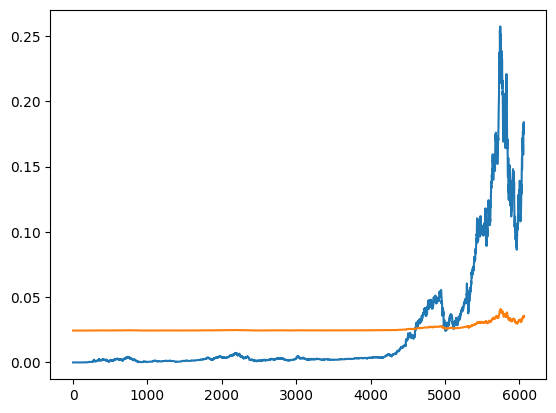

In [ ]:
with torch.inference_mode():
  predicted = model_0(X_train.to(device)).to('cpu').numpy()

  plt.plot(y_train)
  plt.plot(predicted)